<a href="https://colab.research.google.com/github/peisuke/ml-works/blob/main/5/5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5.3 AdaBoostを使った分類の実験
- 内容
    - 乳がんのデータを対象にAdaBoostを用いて分類を行う
- 参考
    - 本コードは以下のサイトを参考にしました
    - https://tech-diary.net/adaboost/

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# データのダウンロード
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target

# 数値や特徴量の確認
display(X.head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# 学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# AdaBoostの学習
base_model = DecisionTreeClassifier(max_depth=3)
adaboost = AdaBoostClassifier(base_estimator=base_model, n_estimators=50)

adaboost.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3))

In [4]:
# テストデータに対する精度の確認
pred = adaboost.predict(X_test)
result = classification_report(y_test, pred, output_dict=True, target_names=cancer.target_names)
df = pd.DataFrame(result).transpose()

In [5]:
# 精度の計算
print((y_test == pred).sum() / len(y_test))

0.9736842105263158


In [6]:
# より詳細な精度の確認（表の意味は、https://gotutiyan.hatenablog.com/entry/2020/09/09/111840、などを参照
display(df[:2])
display(df[2:])

,precision,recall,f1-score,support
malignant,0.980392,0.961538,0.970874,52.0
benign,0.968254,0.983871,0.976000,62.0


,precision,recall,f1-score,support
accuracy,0.973684,0.973684,0.973684,0.973684
macro avg,0.974323,0.972705,0.973437,114.000000
weighted avg,0.973791,0.973684,0.973662,114.000000


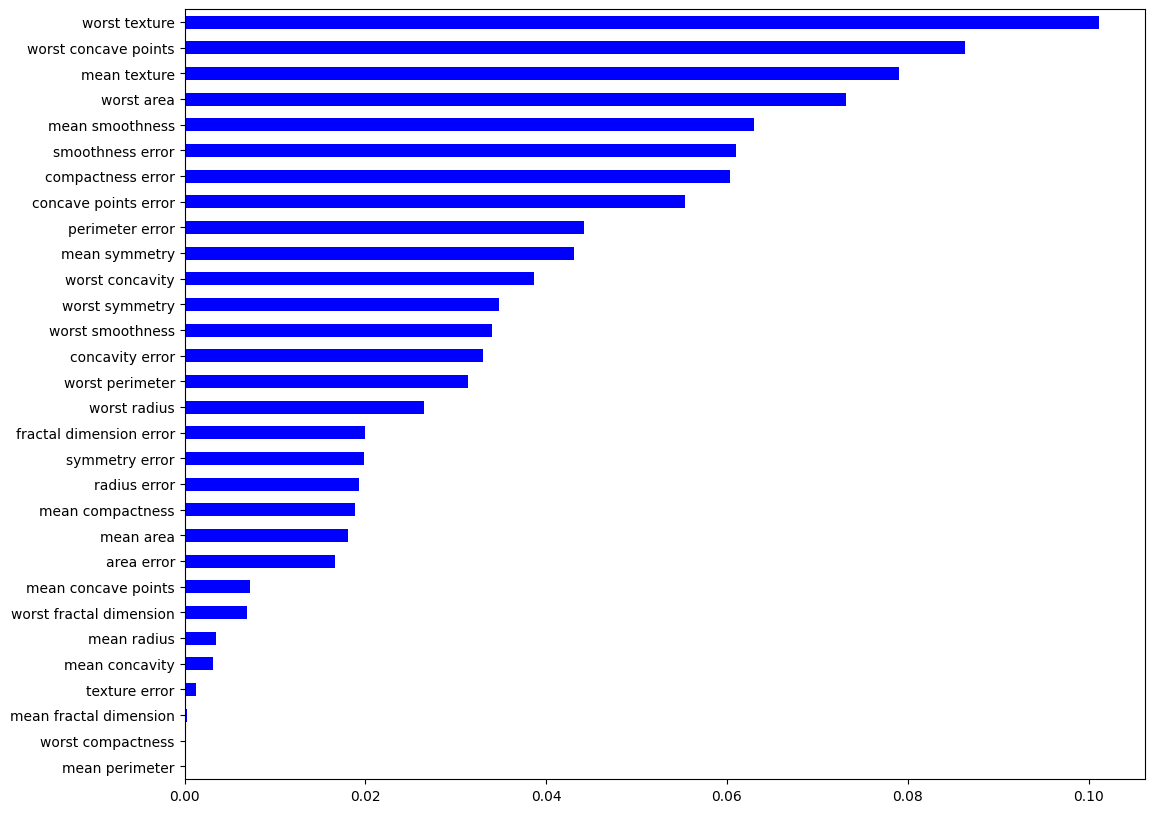

In [7]:
# 特徴量の重要度の可視化
s = pd.Series(adaboost.feature_importances_, index=cancer.feature_names)
s = s.sort_values(ascending=True)

plt.figure(figsize=(16, 10))
s.plot.barh(color="b")
plt.subplots_adjust(left=0.3)
plt.show()